In [1]:
import tensorflow as tf
from keras.layers.core import Dense, Flatten, Dropout
from keras import regularizers
from keras import layers
fashion_mnist = tf.keras.datasets.fashion_mnist  
(x_train,y_train),(x_test, y_test) = fashion_mnist.load_data()
#Normalize Data Set:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# x=1000
# for i in range(15):
#     plt.subplot(331)
#     plt.title('Class: {}'.format(y_train[x]))
#     plt.imshow(x_train[x], cmap=plt.get_cmap('Greys'))
#     x = x+5
#     plt.show()

In [43]:
#Note: I think my model is overfitting, so I need to fix it, by adding regularizers and dropouts ?
#Dropouts worked the best...
#Creating the model:
reduced_model = tf.keras.models.Sequential()
reduced_model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
reduced_model.add(layers.Dropout(0.5))
reduced_model.add(tf.keras.layers.Dense(120, activation=tf.nn.relu))
reduced_model.add(layers.Dropout(0.5))
reduced_model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [44]:
#Compiling and Fitting the Model:
# model = tf.keras.models.load_model('model_5')
reduced_model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
reduced_history = reduced_model.fit(x_train, y_train , validation_data=(x_test,y_test) , epochs = 20) #The Validation data accuracy shouldn't be greater than the accuracy of the training data.

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7354 - accuracy: 0.7293 - val_loss: 0.5119 - val_accuracy: 0.8077
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5704 - accuracy: 0.7884 - val_loss: 0.4737 - val_accuracy: 0.8281
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5429 - accuracy: 0.7986 - val_loss: 0.4491 - val_accuracy: 0.8382
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5269 - accuracy: 0.8021 - val_loss: 0.4396 - val_accuracy: 0.8403
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5114 - accuracy: 0.8105 - val_loss: 0.4339 - val_accuracy: 0.8433
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5052 - accuracy: 0.8137 - val_loss: 0.4259 - val_accuracy: 0.8442
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4957 - accuracy: 0.8176 - val_loss: 0.4196 - val_accuracy:

[[0.         0.         0.         0.         0.01171375 0.00559765
  0.00378145 0.         0.         0.         0.01884462 0.09097738
  0.07566589 0.05829873 0.06149589 0.15070106 0.07265765 0.00195902
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.01171375 0.00279883
  0.         0.03126405 0.10749531 0.15150667 0.13191235 0.15596123
  0.18916473 0.20951105 0.21865205 0.19351386 0.14713174 0.18806545
  0.29713784 0.1210436  0.00242457 0.         0.00354176 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.01171375 0.
  0.04915891 0.27825002 0.19055987 0.15819078 0.09736388 0.10583083
  0.07944919 0.0619424  0.0444137  0.07535053 0.1362331  0.13517205
  0.27237635 0.2446626  0.15032346 0.         0.00354176 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.31386075 0.

Answer: 


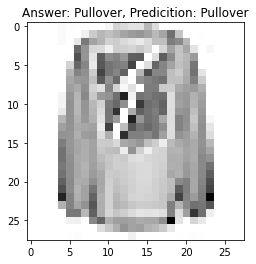

In [53]:
#Predicte
# model =tf.keras.models.load_model('reduced_model_with_drop')
index_from_dataset =222
print(x_test[index_from_dataset])
predict = model.predict([x_test])
labels = {
  0: "T-shirt/top",
  1: "Trouser",
  2: "Pullover",
  3: "Dress",
  4: "Coat",
  5: "Sandal",
  6: "Shirt",
  7: "Sneaker",
  8: "Bag",
  9: "Ankle boot",
}  
print("Answer: ")
plt.title('Answer: {}, Predicition: {}'.format(labels[y_test[index_from_dataset]],labels[np.argmax(predict[index_from_dataset])]))
plt.imshow(x_test[index_from_dataset],cmap=plt.cm.binary)
plt.show()

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                                 
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

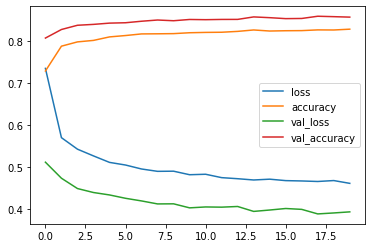

In [46]:
import pandas as pd
# # pd.DataFrame().plot()
# # type(model.history)
# # print(history.history.keys())
pd.DataFrame(reduced_history.history).plot()

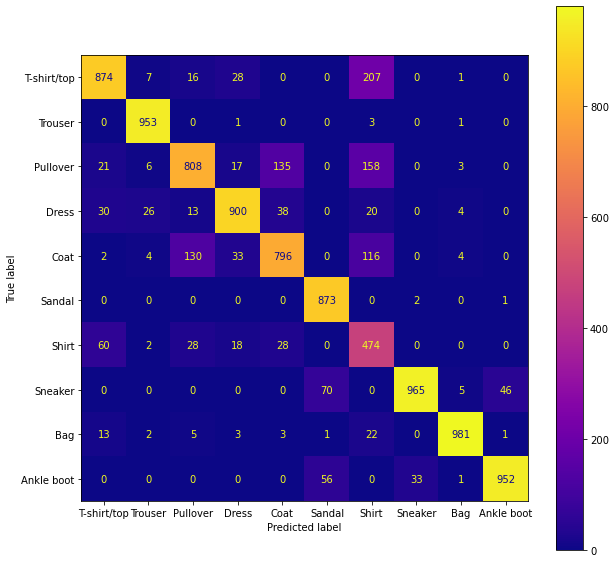

In [66]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix,accuracy_score, ConfusionMatrixDisplay
pred = reduced_model.predict(x_test)
pred = pred.argmax(axis=1)
labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
# Creating Confusion matrix
cm=confusion_matrix(pred ,y_test)
# Ploting Confusion matrix 
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
fig,ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap = 'plasma');

In [29]:
def eval_metric(model, history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]
    e = range(1, 20 + 1)
    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.xlabel('Epoch number')
    plt.ylabel(metric_name)
    plt.title('Comparing training and validation ' + metric_name + ' for ' + model.name)
    plt.legend()
    plt.show()

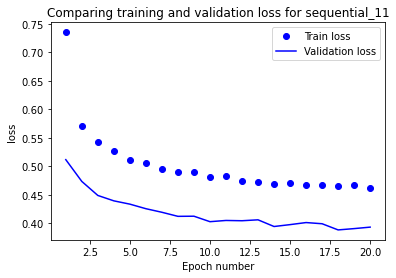

In [48]:
eval_metric(reduced_model, reduced_history, 'loss')

In [49]:
# reduced_model.save("reduced_model_with_drop")

INFO:tensorflow:Assets written to: reduced_model_with_drop\assets


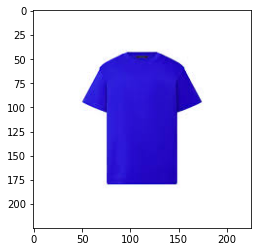

Probability:  0 1.0
Probability:  1 0.0
Probability:  2 0.0
Probability:  3 0.0
Probability:  4 0.0
Probability:  5 0.0
Probability:  6 0.0
Probability:  7 0.0
Probability:  8 0.0
Probability:  9 0.0
0
Predicition: T-shirt/top


In [67]:
import cv2 as cv
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
imgname = 'download5.jpg'
model= tf.keras.models.load_model("reduced_model_with_drop")
reg_img = cv.imread(imgname)
plt.imshow(reg_img, cmap=plt.cm.binary)
plt.show()

img = load_img(imgname, color_mode = "grayscale", target_size=(28, 28),interpolation='nearest')
# img.show()
img = img_to_array(img)
img = img.reshape(1, 28, 28, 1)
img = img.astype('float32')
#img = img/255 used to give me bag everytime...
img = 255 - img
predict = model.predict([img])
for i in range (0,10):
    b = predict[0][i]
    print("Probability: " , i,b)
labels = {
  0: "T-shirt/top",
  1: "Trouser",
  2: "Pullover",
  3: "Dress",
  4: "Coat",
  5: "Sandal",
  6: "Shirt",
  7: "Sneaker",
  8: "Bag",
  9: "Ankle boot",
}  

print(np.argmax(predict))
print('Predicition: {}'.format(labels[np.argmax(predict)]))
